# **Implementasi Metode K-Means untuk Pengelompokan Kasus Covid-19 di Indonesia**







**Deskripsi Kasus dan Permasalahan Dataset**

Kasus ini membahas implementasi algoritma K-Means untuk pengelompokan kasus Covid-19 di Indonesia. Dataset yang digunakan diambil dari situs web kaggle "https://www.kaggle.com/datasets/hendratno/covid19-indonesia/data". Dataset tersebut berisi Date, Location ISO Code, Location, New Cases, New Deaths, New Recovered, New Active Cases, Total Cases, Total Deaths, Total Recovered, Total Active Cases, dan lain-lain.

Adapun tujuan dari implementasi metode K-Means adalah untuk mengelompokkan setiap provinsi di Indonesia ke dalam beberapa klaster tertentu sehingga dapat mengetahui daerah-daerah dengan jumlah kasus yang tergolong banyak dan jumlah kasus yang tergolong sedikit.

### Permasalahan yang Terdapat pada Dataset:

1. **Variabilitas Data yang Tinggi**:
   - Dataset Covid-19 memiliki variabilitas yang tinggi karena data diambil dari berbagai wilayah dengan kondisi yang sangat beragam. Hal ini menyebabkan adanya variasi yang besar dalam jumlah kasus, angka kesembuhan, dan angka kematian antar wilayah.
  
2. **Data Missing atau Tidak Lengkap**:
   - Beberapa wilayah mungkin tidak melaporkan data secara lengkap atau konsisten setiap hari, sehingga terdapat missing values yang dapat mempengaruhi hasil pengelompokan.

### Solusi untuk Mengatasi Permasalahan di Atas:
1) Tahap Pengumpulan Data

2) Tahap Processing Data

3) Visualisasi

4) Modelling, Pengujian Data dan Analisis Data

Implementasi metode K-Means diharapkan dapat membantu dalam memahami pola penyebaran Covid-19 di Indonesia, mengidentifikasi wilayah-wilayah yang memerlukan perhatian khusus, dan membantu dalam merancang kebijakan yang lebih efektif dalam penanganan pandemi.


**Daftar Isi**
1. Pendahuluan

 1.1 K-Means

 1.2 Penjelasan Dataset
2. Dataset

 2.1 Processing

 2.2 Visualisasi

 2.3 Modelling, Pengujian Data dan Analisis Data
3. Penutup

# **1. Pendahuluan**


**1.1 K-Means**

**Pengertian:**

K-Means adalah salah satu algoritma clustering yang digunakan untuk mengelompokkan data ke dalam sejumlah K cluster yang telah ditentukan. Algoritma ini bertujuan untuk membagi data sedemikian rupa sehingga data dalam setiap cluster memiliki kemiripan yang tinggi.

**Cara Kerja:**

K-Means bekerja dengan cara inisialisasi *k* titik pusat klaster secara acak. Setelah itu, titik pusat klaster diperbarui dengan menghitung rata-rata dari semua data yang termasuk dalam masing-masing klaster. Proses penetapan label dan pembaruan titik pusat ini diulangi hingga posisi titik pusat tidak lagi berubah secara signifikan atau jumlah iterasi maksimum tercapai.

**1.2 Penjelasan Dataset**

Dalam dataset ini, terdapat variabel sebagai berikut:
* Date
* Location ISO Code
* Location
* New Cases
* New Deaths
* New Recovered
* New Active Cases
* Total Cases, Total Deaths
* Total Recovered
* Total Active Cases
* Location Level
* City or Regency
* Province
* Country
* Continent
* Island
* Time Zone
* dll

# **2. Dataset**

# **2.1 Processing**

Import Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Mendefiniskan nama kolom dalam dataset agar memudahkan dalam proses pengkodean selanjutnya

In [ ]:
class ColumnData:
  date = 'Date'
  province = 'Province'
  island = 'Island'
  cases = 'Total Cases'
  deaths = 'Total Deaths'
  recovered = 'Total Recovered'
  actives_cases = 'Total Active Cases'
  population = 'Population'
  area = 'Area (km2)'
  mortality = 'Mortality'
  density = 'Population Density'

Mendefinisikan create bins untuk splitting & binning data

In [ ]:
def create_bins(df, columns, q=5):
  for column in columns:
    df[column] = pd.qcut(df[column], q, duplicates='drop').cat.codes

Mendefinisikan normalize_data untuk normalizing data

In [ ]:
def normalize_data(df, columns):
  minMaxScaler = MinMaxScaler()
  df[columns] = minMaxScaler.fit_transform(d[columns])

Membaca Dataset - Membaca dan menampilkan 5 data

In [ ]:
from google.colab import files


# Upload the file
uploaded = files.upload()

Saving covid_19_indonesia_time_series_all.csv to covid_19_indonesia_time_series_all.csv


In [ ]:
import pandas as pd
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')

data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


Memilih kolom yang akan digunakan

In [ ]:
data = data[[
    ColumnData.date,
    ColumnData.province,
    ColumnData.island,
    ColumnData.cases,
    ColumnData.deaths,
    ColumnData.recovered,
    ColumnData.actives_cases,
    ColumnData.population,
    ColumnData.area,
    ColumnData.density
]]

In [ ]:
#Menghapus jika ada data yang kosong

data = data.dropna(axis=0, how="any")

In [ ]:
#Membuat format data pada tanggal menjadi date.
data[ColumnData.date] = pd.to_datetime(data.Date, infer_datetime_format=True).dt.date

<ipython-input-13-8f645fe8d771>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data[ColumnData.date] = pd.to_datetime(data.Date, infer_datetime_format=True).dt.date


In [ ]:
#Membuat kolom baru yaitu ‘Mortality’
data[ColumnData.mortality] = data[ColumnData.deaths] / data[ColumnData.cases]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30893 entries, 0 to 31820
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                30893 non-null  object 
 1   Province            30893 non-null  object 
 2   Island              30893 non-null  object 
 3   Total Cases         30893 non-null  int64  
 4   Total Deaths        30893 non-null  int64  
 5   Total Recovered     30893 non-null  int64  
 6   Total Active Cases  30893 non-null  int64  
 7   Population          30893 non-null  int64  
 8   Area (km2)          30893 non-null  int64  
 9   Population Density  30893 non-null  float64
 10  Mortality           30893 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.8+ MB


# **2.2 Visualisasi**

Jumlah kasus dan kematian dalam kurun waktu, setiap data dibagi jika jumlah kasus melebihi 100.

In [ ]:
dfl = data[
    [ColumnData.date, ColumnData.cases, ColumnData.deaths, ColumnData.recovered]
].groupby(ColumnData.date).sum().reset_index()

dfl = dfl[(dfl[ColumnData.cases] >= 100)].melt(id_vars=ColumnData.date,
value_vars=[ColumnData.cases, ColumnData.deaths, ColumnData.recovered])

In [ ]:
#Visualisasi jumlah perkembangan kasus dengan line plot
import plotly.express as px

vis_lp = px.line(dfl, x=ColumnData.date, y='value', color='variable')
vis_lp.update_layout(title='COVID-19 in Indonesia: total number of cases over time',
xaxis_title='Indonesia', yaxis_title='Number of cases',
legend=dict(x=0.02, y=0.98))
vis_lp.show()

Pada visualisasi digambarkan kasus COVID-19 di Indonesia pada bulan April 2020 hingga Juli 2022 mengalami peningkatan secara signifikan. Jumlah kasus COVID-19 hingga Juli 2022 tercatat sebanyak 6.000 juta kasus dengan jumlah pasien sembuh sebanyak 5.800 juta sekian orang dan jumlah pasien yang meninggal sebanyak 156.854 ribu orang.

In [ ]:
#Visualisasi line plot 5 provinsi dengan jumlah kasus dan kematian tertinggi
pd.options.mode.chained_assignment = None
limit = 5
group = data.groupby(ColumnData.province)
t = group.tail(1).sort_values(ColumnData.cases, ascending=False).set_index(ColumnData.province).drop(
    columns=[ColumnData.date])

s = data[(data[ColumnData.province].isin([i for i in t.index[:limit]]))]
s = s[(s[ColumnData.cases] >= 100)]

# vis_lp = visualization line plot
vis_lp2 = px.line(s, x=ColumnData.date, y=ColumnData.cases, color=ColumnData.province)
vis_lp2.update_layout(title='COVID-19 in Indonesia: total number of cases over time',
                      xaxis_title=ColumnData.date, yaxis_title='Number of cases',
                      legend_title='<b>Top %s provinces</b>' % limit,
                      legend=dict(x=0.02, y=0.98))
vis_lp2.show()

Pada visualisasi data 5 provinsi dengan jumlah kasus terkonfirmasi paling tinggi dari waktu ke waktu. Hingga Juli 2022 tercatat bahwa kasus terbanyak terjadi pada provinsi DKI jakarta yakni sebanyak 1.300 juta kasus sekian. Disusul provinsi Jawa Barat sebanyak 1.100 juta kasus, provinsi Jawa Tengah sebanyak 628 ribu kasus, provinsi Jawa Timur sebanyak 550 ribu kasus, dan di posisi kelima adalah provinsi Sulawesi Selatan sebanyak 280 ribu kasus.

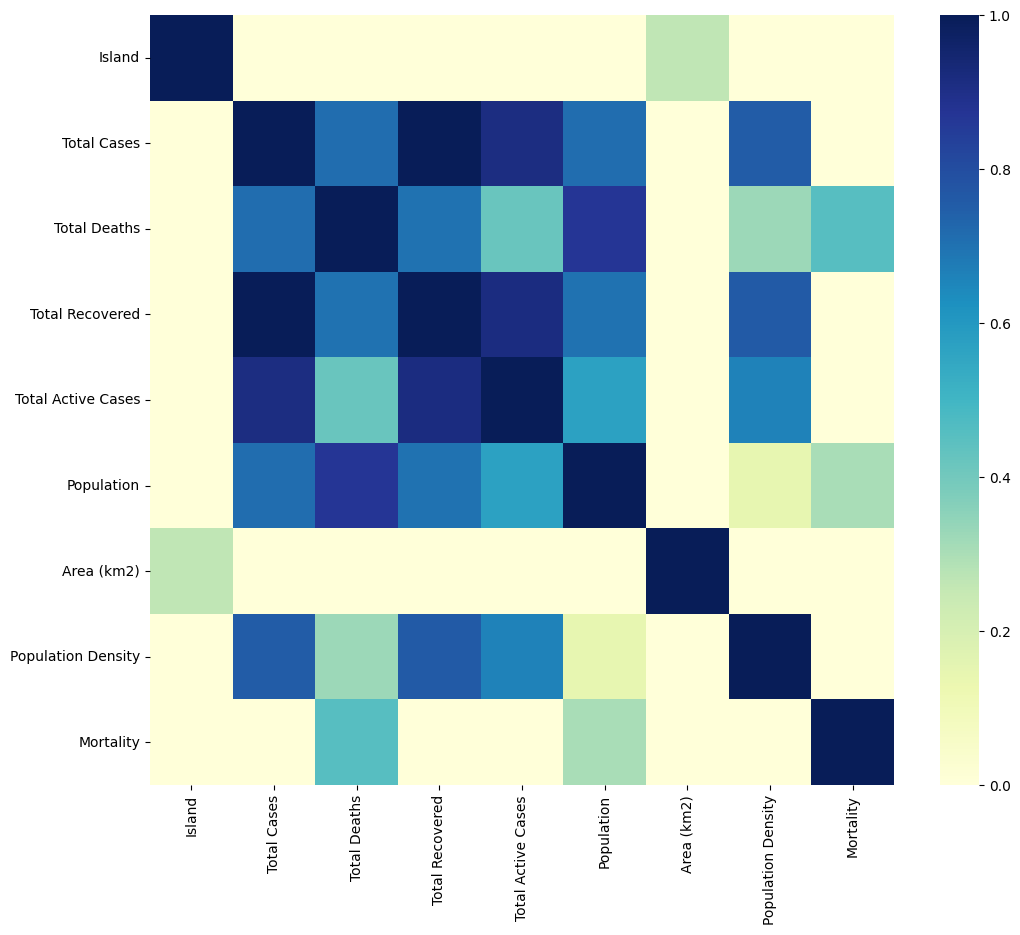

In [ ]:
#Menggunakan korelasi matriks
import matplotlib.pyplot as plt
import seaborn as sns

t.replace({'Jawa': 0, 'Sulawesi': 1, 'Kalimantan': 2, 'Sumatera': 3, 'Maluku': 4, 'Papua': 5, 'Nusa Tenggara': 6},
          inplace=True)

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(t.corr(), vmin=0, cmap='YlGnBu')
plt.show()

Dari hasil visualisasi korelasi matriks didapatkan korelasi antar fitur. Berdasarkan eksplorasi data yang telah diolah maka kami dapat melihat korelasi yang lebih kuat dengan jumlah kasus yaitu fitur berikut :

* Total Cases
* Total Recovered
* Total Active Cases
* Population Density
* Total Deaths
* Population
* Mortality
Fitur-fitur ini yang akan digunakan untuk pengolahan data selanjutnya.

In [ ]:
#Memilih fitur yang akan digunakan

corr = t.corr().iloc[[0, 1]].transpose()
corr = corr[(corr[ColumnData.cases] > 0.25)].sort_values(ColumnData.cases, ascending=False)
features = corr.index.tolist()
features.append(ColumnData.mortality)
print('Selected features:', features)

d = t[features].copy()
d.head()

Selected features: ['Total Cases', 'Total Recovered', 'Total Active Cases', 'Population Density', 'Total Deaths', 'Population', 'Mortality']


,Total Cases,Total Recovered,Total Active Cases,Population Density,Total Deaths,Population,Mortality
Province,,,,,,,
DKI Jakarta,1412511,1386134,10864,16334.31,15513,10846145,0.010983
Jawa Barat,1173731,1144358,13436,1276.55,15937,45161325,0.013578
Jawa Tengah,636409,601517,1403,1108.64,33489,36364072,0.052622
Jawa Timur,601545,569003,778,846.78,31764,40479023,0.052804
Banten,333875,328482,2443,1109.64,2950,10722374,0.008836


Dari fitur yang dipilih akan dibagi menjadi 7 bagian dan dilakukan normalisasi agar data lebih mudah dipahami dengan jarak antara 0-1


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

create_bins(d, [
    ColumnData.cases,
    ColumnData.deaths,
    ColumnData.recovered,
    ColumnData.actives_cases,
    ColumnData.population,
    ColumnData.mortality,
    ColumnData.density
], q=7)

normalize_data(d, d.columns)
d.head()

,Total Cases,Total Recovered,Total Active Cases,Population Density,Total Deaths,Population,Mortality
Province,,,,,,,
DKI Jakarta,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.0
Jawa Barat,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.0
Jawa Tengah,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0
Jawa Timur,1.0,1.0,1.0,0.833333,1.000000,1.000000,1.0
Banten,1.0,1.0,1.0,1.000000,0.666667,0.833333,0.0


# **2.3 Modelling, Pengujian Data dan Analisis Data**

In [ ]:
X = d[['Mortality', 'Total Cases','Total Active Cases', 'Population Density', 'Population', 'Total Deaths']]

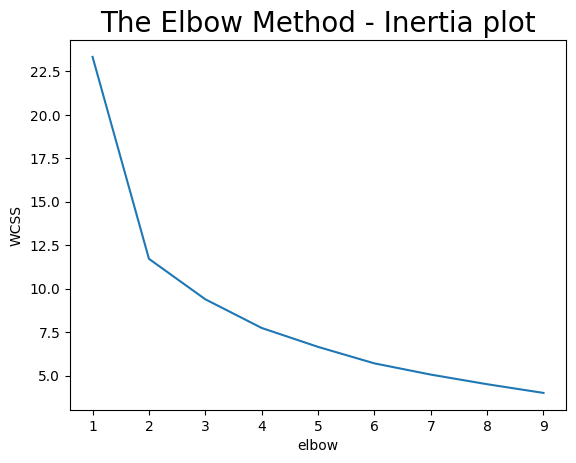

In [ ]:
#Menentukan nilai cluster(k)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method - Inertia plot
inertia = []

# Looping the inertia calculation for each k
for k in range(1, 10):
    # Assign KMeans as cluster_model with explicit n_init value
    cluster_model = KMeans(n_clusters=k, random_state=24, n_init=10)
    # Fit cluster_model to X
    cluster_model.fit(X)
    # Get the inertia value
    inertia_value = cluster_model.inertia_
    # Append the inertia_value to inertia list
    inertia.append(inertia_value)

# Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize=20)
plt.xlabel('elbow')
plt.ylabel('WCSS')
plt.show()


Pada visualisasi diatas dapat terlihat elbow pada 2 dan 6. dan dalam pengujian ini saya menggunakan k=6.


In [ ]:
#K-means Clustering dengan k=6

kmeans = KMeans(n_clusters=6, n_init=10)
pred = kmeans.fit_predict(d[d.columns])
t['K-means'], d['K-means'] = [pred, pred]
d[d.columns].sort_values(['K-means', ColumnData.mortality, ColumnData.cases, ColumnData.actives_cases, ColumnData.density], ascending=False).style.background_gradient(
    cmap='YlGnBu', low=0, high=0.2)

,Total Cases,Total Recovered,Total Active Cases,Population Density,Total Deaths,Population,Mortality,K-means
Province,,,,,,,,
Sumatera Barat,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,5
Sulawesi Selatan,0.666667,0.666667,0.500000,0.666667,0.666667,0.833333,0.166667,5
Nusa Tenggara Timur,0.666667,0.666667,0.333333,0.666667,0.333333,0.666667,0.166667,5
Kalimantan Barat,0.500000,0.500000,0.333333,0.166667,0.333333,0.666667,0.166667,5
Papua,0.333333,0.333333,0.666667,0.000000,0.166667,0.500000,0.000000,5
Aceh,0.166667,0.166667,0.333333,0.333333,0.500000,0.666667,1.000000,4
Gorontalo,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.833333,4
Sulawesi Barat,0.000000,0.000000,0.000000,0.500000,0.000000,0.166667,0.666667,4
Jambi,0.166667,0.166667,0.166667,0.333333,0.166667,0.333333,0.500000,4


In [ ]:
#Visualisasi dengan Treemap hasil Klasterisasi Provinsi

vis_tmap = px.treemap(t.reset_index(), path=['K-means', ColumnData.province], values=ColumnData.cases)
vis_tmap.update_layout(title='K-means clusters')
vis_tmap.show()


In [ ]:
vis_tmap = px.treemap(t.reset_index(), path=['K-means', ColumnData.province], values=ColumnData.mortality)
vis_tmap.update_layout(title='K-means clusters')
vis_tmap.show()

In [ ]:
#Visualisasi Jumlah kasus aktif dari tiap provinsi dari masing-masing cluster menggunakan bar chart

c = t.sort_values(['K-means', ColumnData.cases], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.cases],
               text=c[(c['K-means'] == i)][ColumnData.cases], name=i) for i in range(0, 6)]

vis_bar = go.Figure(data=data)
vis_bar.update_layout(title='K-means Clustering: number of cases by cluster',
                      xaxis_title='Indonesia State', yaxis_title='Deaths per case')
vis_bar.show()

In [ ]:
#Visualisasi Jumlah kemungkinan Kematian dari tiap provinsi dari masing-masing cluster.
import numpy as np

c = t.sort_values(['K-means', ColumnData.mortality], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.mortality],
               text=c[(c['K-means'] == i)][ColumnData.mortality], name=i) for i in range(0, 6)]
data.append(
    go.Scatter(
        x=t.sort_values(ColumnData.mortality, ascending=False).index,
        y=np.full((1, len(t.index)), 0.03).tolist()[0],
        marker_color='black',
        name='Indonesian avg'
    )
)

vis_bar2 = go.Figure(data=data)
vis_bar2.update_layout(title='K-means Clustering: mortality rate by cluster',
                       xaxis_title='Indonesian states', yaxis_title='Deaths per case')
vis_bar2.show()

Pada visualisasi diagram batang yang menunjukkan visualisasi tingkat kemungkinan kematian dari tiap-tiap provinsi menurut cluster yang telah dibagi sebelumnya. Dari ke-6 cluster diatas, cluster 1 dan 5 berada di atas rata-rata kemungkinan kematian di Indonesia dan Cluster 1 merupakan cluster yang memiliki tingkat kematian yang cukup besar dibandingkan cluster yang lain, Sedangkan provinsi yang memiliki tingkat kematian tergolong rendah terdapat pada cluster 4.

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Kelompokkan data berdasarkan klaster dan hitung rata-rata kematian dalam bentuk %
mortality_means_percentage = t.groupby('K-means')[ColumnData.mortality].mean() * 100

# Visualisasi rata-rata kematian setiap klaster dalam bentuk %
vis_bar_mortality_means_percentage = go.Figure(go.Bar(
    x=mortality_means_percentage.index,
    y=mortality_means_percentage,
    text=mortality_means_percentage.round(2),
    marker_color='blue'
))

vis_bar_mortality_means_percentage.update_layout(
    title='Rata-rata Tingkat Kematian per Klaster (dalam %)',
    xaxis_title='Klaster',
    yaxis_title='Rata-rata Kematian (%)',
    showlegend=False
)

vis_bar_mortality_means_percentage.show()


**ANALISIS HASIL CLUSTERING**

* Klaster 1 (Cluster 0) : Lampung, Jawa Timur, Jawa Tengah, Sumsel, Riau, Bali, dan DIY Yogyakarta. Dengan rataan Tingkat kemungkinan Kematian 4%
* Klaster 2 (Cluster 1) : Kalsel, Sulteng, Kaltim, Kepulauan Riau, Kep. Bangka Belitung, Sulut. Dengan rataan Tingkat kemungkinan Kematian 2,5%
* Klaster 3 (Cluster 2) : Maluku Utara, Sulteng, Kalut, Bengkulu, Maluku, Papua Barat. Dengan tingkat kemungkinan Kematian 1,8%
* Klaster 4 (Cluster 3) : Sumut, Jabar, DKI Jakarta, Banten. Dengan tingkat kemungkinan Kematian 1,3%
* Klaster 5 (Cluster 4) : Aceh, Gorontalo, Sulbar, NTB, Jambi. Dengan tingkat kemungkinan Kematian 3,1%
*Klaster 6 (Cluster 5) : Sumbar, Kalbar, Sulsel, NTT, Papua. Dengan tingkat kemungkinan Kematian 1.7%

In [3]:
from google.colab import files


# Upload the file
uploaded = files.upload()

Saving covid_19_indonesia_time_series_all.csv to covid_19_indonesia_time_series_all.csv


In [10]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Membuat dataset contoh
n_samples = 1500
n_features = 2
n_clusters = 6
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# Menerapkan K-means dengan menetapkan nilai n_init secara eksplisit
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Evaluasi menggunakan Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(y_true, y_kmeans)
print(f"Adjusted Rand Index (ARI): {ari_score}")

Adjusted Rand Index (ARI): 0.8668034470633565


# **Kesimpulan**

Pada karakteristik data diketahui bahwa kasus baru terbanyak terjadi pada Juli 2022 dengan jumlah kasus mencapai 6.000 juta kasus. Hingga 11 Oktober 2020 tercatat sebanyak 333.449 kasus dengan jumlah pasien sembuh sebanyak 5.800 juta sekian orang dan jumlah pasien yang meninggal sebanyak 156.854 ribu orang. DKI Jakarta menempati posisi pertama dengan jumlah kasus tertinggi yakni sebanyak 1.300 juta kasus sekian. Provinsi dengan jumlah kasus paling banyak lainnya yaitu Jawa Timur, Jawa Barat, Jawa Tengah dan Sulawesi Selatan. Sedangkan provinsi dengan tingkat kematian paling tinggi akibat COVID-19 yaitu provinsi Lampung. Dari hasil ini didapatkan bahwa Jumlah kematian pasien COVID-19 di suatu provinsi bukan acuan utama dalam menentukan klaster penanganan COVID-19, disamping menghitung jumlah kematian pasien ada indikator lain yang dapat mempengaruhi pembagian klasterisasi dalam penentuan penanganan COVID-19 di Indonesia Seperti tingkat kemungkinan kematian, jumlah kasus yang masih aktif, serta kepadatan penduduk.